In [ ]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm

In [ ]:
pip install scikit-learn-extra

     |████████████████████████████████| 1.7 MB 5.1 MB/s 


In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn_extra.cluster import KMedoids
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (13, 8)
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
original = pd.read_csv('/content/drive/MyDrive/EM:IP/정리/최종 데이터 파일/variables/3_OutliersNormalization_3_FullC_7.0_scoring_cleaned_final_extra_variables.csv', sep=',')
original.head()

,ID,cnt,time_A_total,time_b1,time_b2,time_explore,time_B_total,time_start,time_end,time_solving,...,ranking,score,rank_code,TOTALSCORE,ratio,logit,mean,weight,ratio_100,logit_100
0,ARE000018804820,ARE,3.837299,2.442347,0.000000,3.837299,2.442347,3.732896,2.261763,4.091006,...,40,411,4,5,0.276323,0.381832,168.640000,3290.234652,27.632312,38.183218
1,ARE000039910042,ARE,2.476538,1.667707,3.303217,5.779755,3.449988,3.081910,1.435085,4.266896,...,40,411,4,6,0.372276,0.593057,227.200000,4432.763952,37.227593,59.305664
2,ARE000006001557,ARE,3.214868,1.568616,3.449988,6.664855,3.563883,2.332144,1.458615,4.489759,...,40,411,4,17,0.614337,1.592937,338.719048,7315.032545,61.433692,159.293681
3,ARE000024506213,ARE,1.740466,1.667707,3.157000,4.897467,3.325036,2.151762,1.902108,3.678829,...,40,411,4,23,0.850317,5.680806,482.138095,10124.900000,85.031745,568.080570
4,ARE000006601699,ARE,3.353407,2.549445,0.000000,3.353407,2.549445,3.005683,1.163151,3.987130,...,40,411,4,5,0.382517,0.619477,233.450000,4554.703982,38.251680,61.947725


In [ ]:
original[original.isnull().any(axis=1)]

,ID,cnt,time_A_total,time_b1,time_b2,time_explore,time_B_total,time_start,time_end,time_solving,...,ranking,score,rank_code,TOTALSCORE,ratio,logit,mean,weight,ratio_100,logit_100


In [ ]:
df = original[['time_A_total','time_start','time_b1','time_not_answer','time_solving','avg_time_btw_events','length']]
df

,time_A_total,time_start,time_b1,time_not_answer,time_solving,avg_time_btw_events,length
0,3.837299,3.732896,2.442347,1.360977,4.091006,1.928619,2
1,2.476538,3.081910,1.667707,3.397858,4.266896,0.968839,5
2,3.214868,2.332144,1.568616,3.430756,4.489759,1.509397,4
3,1.740466,2.151762,1.667707,2.091864,3.678829,1.145637,4
4,3.353407,3.005683,2.549445,2.674149,3.987130,1.623189,2
...,...,...,...,...,...,...,...
7087,2.208274,2.815409,2.230014,0.955511,2.944439,1.178655,2
7088,3.288402,3.034953,2.525729,1.686399,3.754199,1.642873,2
7089,3.608212,3.246491,2.631889,0.875469,3.935740,1.984444,2
7090,3.535145,2.557227,2.821379,0.641854,3.931826,1.712979,2


In [ ]:
df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7092 entries, 0 to 7091
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   time_A_total         7092 non-null   float64
 1   time_start           7092 non-null   float64
 2   time_b1              7092 non-null   float64
 3   time_not_answer      7092 non-null   float64
 4   time_solving         7092 non-null   float64
 5   avg_time_btw_events  7092 non-null   float64
 6   length               7092 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 443.2 KB


In [ ]:
df_2 = df[['time_start','time_b1','time_not_answer']]
df_2

,time_start,time_b1,time_not_answer
0,3.732896,2.442347,1.360977
1,3.081910,1.667707,3.397858
2,2.332144,1.568616,3.430756
3,2.151762,1.667707,2.091864
4,3.005683,2.549445,2.674149
...,...,...,...
7087,2.815409,2.230014,0.955511
7088,3.034953,2.525729,1.686399
7089,3.246491,2.631889,0.875469
7090,2.557227,2.821379,0.641854


In [ ]:
x = df_2.to_numpy()
x = RobustScaler().fit_transform(x)
df_scale = pd.DataFrame(x, columns = df_2.columns, index = df_2.index)
df_scale

,time_start,time_b1,time_not_answer
0,1.492861,0.256136,-0.128915
1,0.331750,-0.909484,1.706046
2,-1.005547,-1.058588,1.735683
3,-1.327279,-0.909484,0.529518
4,0.195789,0.417289,1.054079
...,...,...,...
7087,-0.143587,-0.063366,-0.494185
7088,0.247996,0.381602,0.164248
7089,0.625299,0.541344,-0.566293
7090,-0.604084,0.826474,-0.776749


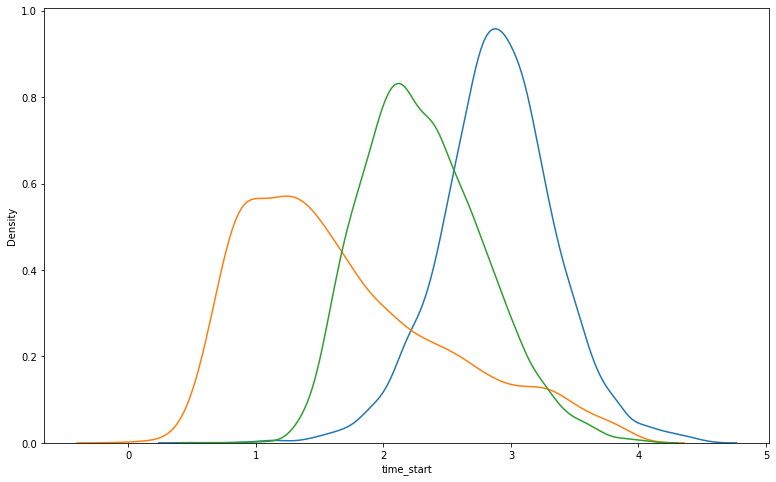

In [ ]:
sns.kdeplot(df['time_start'])
sns.kdeplot(df['time_not_answer'])
sns.kdeplot(df['time_b1'])

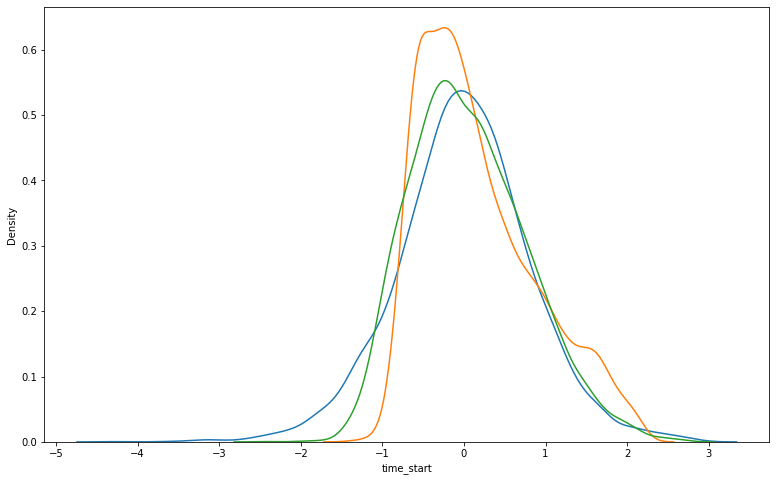

In [ ]:
sns.kdeplot(df_scale['time_start'])
sns.kdeplot(df_scale['time_not_answer'])
sns.kdeplot(df_scale['time_b1'])

100%|██████████| 14/14 [00:28<00:00,  2.01s/it]


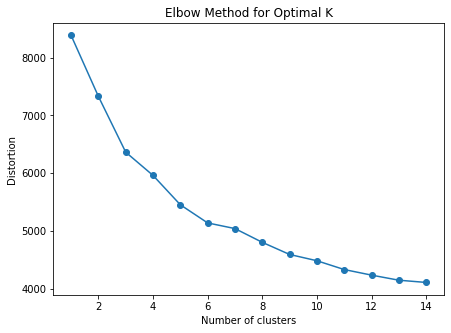

In [ ]:
distortions = []
for i in tqdm(range(1, 15)):
    kmedoids = KMedoids(n_clusters=i, random_state=0).fit(x)
    #inertia가 군집 내의 분산을 의미
    distortions.append(kmedoids.inertia_)

# plot
plt.figure(figsize=(7,5))
plt.plot(range(1, 15), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal K')
plt.show()

In [ ]:
num = 4
kmedoids = KMedoids(n_clusters=num, random_state=0).fit(x)
print(kmedoids.labels_)

[2 1 1 ... 2 2 1]


In [ ]:
df_scale['cluster'] = kmedoids.labels_
df_scale

,time_start,time_b1,time_not_answer,cluster
0,1.492861,0.256136,-0.128915,2
1,0.331750,-0.909484,1.706046,1
2,-1.005547,-1.058588,1.735683,1
3,-1.327279,-0.909484,0.529518,0
4,0.195789,0.417289,1.054079,1
...,...,...,...,...
7087,-0.143587,-0.063366,-0.494185,0
7088,0.247996,0.381602,0.164248,2
7089,0.625299,0.541344,-0.566293,2
7090,-0.604084,0.826474,-0.776749,2


# 두 변수 상관이 너무 높음

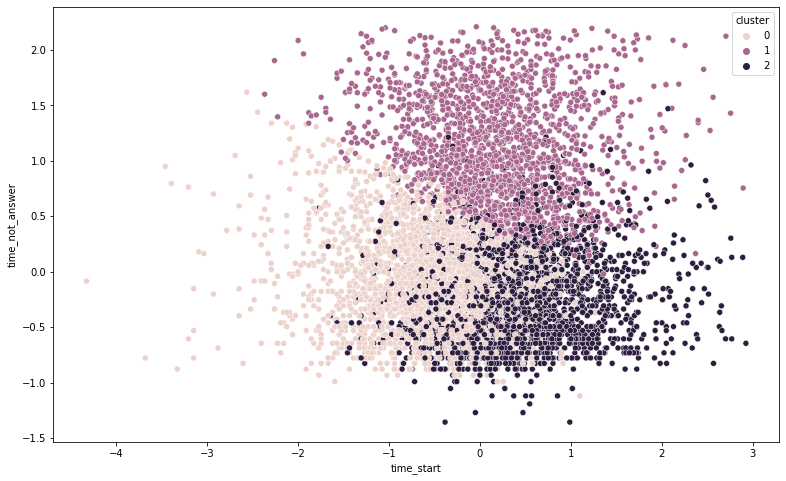

In [ ]:
sns.scatterplot(data=df_scale, x="time_start", y="time_not_answer", hue="cluster")

Text(0.5, 0, 'time_not_answer')

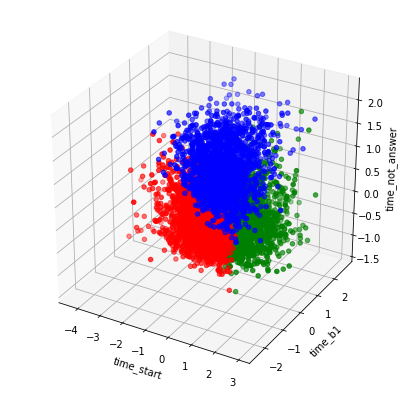

In [ ]:
# 3차원 코드 참고
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
colors = ['r','b','g','purple','orange','gray']

for i, color in enumerate(colors):
    x = df_scale[df_scale['cluster'] == i]['time_start']
    y = df_scale[df_scale['cluster'] == i]['time_b1']
    z = df_scale[df_scale['cluster'] == i]['time_not_answer']
    ax.scatter(x,y,z,c=color,marker='o')

ax.set_xlabel('time_start')
ax.set_ylabel('time_b1')
ax.set_zlabel('time_not_answer')

In [ ]:
original['cluster'] = df_scale['cluster']
original

,ID,cnt,time_A_total,time_b1,time_b2,time_explore,time_B_total,time_start,time_end,time_solving,...,score,rank_code,TOTALSCORE,ratio,logit,mean,weight,ratio_100,logit_100,cluster
0,ARE000018804820,ARE,3.837299,2.442347,0.000000,3.837299,2.442347,3.732896,2.261763,4.091006,...,411,4,5,0.276323,0.381832,168.640000,3290.234652,27.632312,38.183218,2
1,ARE000039910042,ARE,2.476538,1.667707,3.303217,5.779755,3.449988,3.081910,1.435085,4.266896,...,411,4,6,0.372276,0.593057,227.200000,4432.763952,37.227593,59.305664,1
2,ARE000006001557,ARE,3.214868,1.568616,3.449988,6.664855,3.563883,2.332144,1.458615,4.489759,...,411,4,17,0.614337,1.592937,338.719048,7315.032545,61.433692,159.293681,1
3,ARE000024506213,ARE,1.740466,1.667707,3.157000,4.897467,3.325036,2.151762,1.902108,3.678829,...,411,4,23,0.850317,5.680806,482.138095,10124.900000,85.031745,568.080570,0
4,ARE000006601699,ARE,3.353407,2.549445,0.000000,3.353407,2.549445,3.005683,1.163151,3.987130,...,411,4,5,0.382517,0.619477,233.450000,4554.703982,38.251680,61.947725,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7087,USA000015004612,USA,2.208274,2.230014,0.000000,2.208274,2.230014,2.815409,1.722767,2.944439,...,508,2,21,0.810571,4.279032,446.914286,9651.634792,81.057132,427.903161,0
7088,USA000015004637,USA,3.288402,2.525729,0.000000,3.288402,2.525729,3.034953,1.252763,3.754199,...,508,2,5,0.380452,0.614081,232.190000,4530.120872,38.045224,61.408056,2
7089,USA000007902358,USA,3.608212,2.631889,0.000000,3.608212,2.631889,3.246491,2.001480,3.935740,...,508,2,18,0.792861,3.827681,431.278947,9440.757125,79.286122,382.768125,2
7090,USA000007902371,USA,3.535145,2.821379,0.000000,3.535145,2.821379,2.557227,2.602690,3.931826,...,508,2,6,0.369966,0.587215,225.790000,4405.254282,36.996559,58.721490,2


In [ ]:
original.to_csv('5_Clustering_1_start,notanswer,b1_3C.csv')